In [151]:
%reset
import numpy as np
from scipy import stats
from scipy import optimize
import matplotlib.pyplot as plt

N1 = 1.0
N2 = 1.0
N3 = 1.0
chi12 = 5.0
chi13 = 1.0
chi23 = 1.0

chi1 = 0.5*(chi12 + chi13 - chi23)
chi2 = 0.5*(chi12 + chi23 - chi13)
chi3 = 0.5*(chi13 + chi23 - chi12)

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [152]:
def equations(p):
    phi1, phi2 = p
    phi3 = 1. - phi1 - phi2
    
#     psi1 = N1 * phi1 / (1. - 2. * chi1 * N1 * phi1)
#     psi2 = N2 * phi2 / (1. - 2. * chi2 * N2 * phi2)
#     psi3 = N3 * phi3 / (1. - 2. * chi3 * N3 * phi3)

   
    f1 = phi1*(1.-2.*chi2*phi2)*(1.-2.*chi3*phi3) +\
         phi2*(1.-2.*chi1*phi1)*(1.-2.*chi3*phi3) +\
         N3*phi3*(1.-2.*chi1*phi1)*(1.-2.*chi2*phi2)
    f2 = phi1*(1.-2.*chi2*phi2)**3.*(1.-2.*chi3*phi3)**3. +\
         phi2*(1.-2.*chi1*phi1)**3.*(1.-2.*chi3*phi3)**3. +\
         N3*phi3*(1.-2.*chi1*phi1)**3.*(1.-2.*chi2*phi2)**3.
    
    return (f1,f2)

def f(p):
    return abs(sum(np.array(equations(p))**2)-0)

PLEASE NOTE: FSOLVE FINDS THE CLOSEST ROOT TO THE FIRST GUESS

GRID IS DEFINED TO SEARCH ALL 4 REGIONS CLOSE TO THE ROOTS

ONE WAY TO FIND ALL THE ROOTS, IF YOU HAD NO IDEA ABOUT THE FIRST GUESS, IS

TO MESH THE SYSTEM, LIKE THE WAY BALAJI DID, AND SEARCH ALL THE REGIONS

calculation for obtaining the critical point

In [153]:
x_dim = np.arange(0.023, 0.99, 0.1)
y_dim = x_dim

###3D Grid
# z_dim = x_dim
# grid = np.zeros((len(x_dim)*len(y_dim)*len(z_dim), 3))

# m = 0
# for i in range(len(x_dim)):
#     for j in range(len(y_dim)):
#         for k in range(len(z_dim)):
#             grid[m,:] = x_dim[i], y_dim[j], z_dim[k]
#             m+=1

###2D Grid
grid = np.zeros((len(x_dim)*len(y_dim), 2))

m = 0
for i in range(len(x_dim)):
    for j in range(len(y_dim)):
        grid[m,:] = x_dim[i], y_dim[j]
        m+=1

Following will solve the equations with fsolve function

In [154]:
roots =[]
from tqdm.notebook import tqdm
for i in tqdm(range(len(grid))):
    initial_guess = optimize.fmin(f, (grid[i]))
    pr = optimize.fsolve(equations, initial_guess)
    if (np.abs(equations(pr))<1e-11).all():
        roots.append(pr)
roots = np.array(roots)
r3 = 1.-(roots[:,0]+roots[:,1])
roots = roots[((roots[:,0]>=0.0) & (roots[:,0]<=1.0) & (roots[:,1]>=0.0) & (roots[:,1]<=1.0) &\
              ((1.-roots[:,0]-roots[:,1])>=0.0) & ((1.-roots[:,0]-roots[:,1])<=1.0))]

rounded_root = stats.mode(np.round(roots, 2))[0]

Optimization terminated successfully.
         Current function value: 1.068703
         Iterations: 28
         Function evaluations: 49
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 100
         Function evaluations: 187
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 121
         Function evaluations: 228
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 114
         Function evaluations: 211
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 108
         Function evaluations: 201
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 121
         Function evaluations: 220
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 148
         Function evaluations: 274
Optimization terminate

E:\python_setup_files\installation_Anaconda3\lib\site-packages\scipy\optimize\minpack.py:162: RuntimeWarning: The number of calls to function has reached maxfev = 600.
  warnings.warn(msg, RuntimeWarning)



         Current function value: 0.000000
         Iterations: 101
         Function evaluations: 185
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 91
         Function evaluations: 163
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 68
         Function evaluations: 131
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 73
         Function evaluations: 138
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 71
         Function evaluations: 132
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 48
         Function evaluations: 91
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 57
         Function evaluations: 109
Optimization terminated successfully.
         Current function 

In [155]:
print("(phi1, phi2, phi3):", (rounded_root[0,0], rounded_root[0,1], 1.-(rounded_root[0,0]+rounded_root[0,1])))

(phi1, phi2, phi3): (0.2, 0.2, 0.6)


Let's plot "equations" function to see the result:

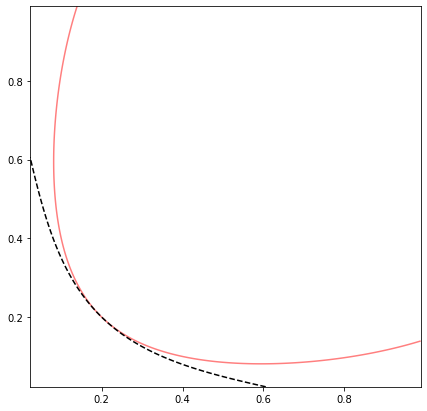

In [156]:
###
x, y = np.meshgrid(
    np.arange(0.023, .99, 0.003),
    np.arange(0.023, .99, 0.003))
plt.figure(figsize=(7,7))
Eq1_fig = plt.contour(x, y,
             equations([x, y])[0], 
             levels=[0], alpha=0.5, cmap='rainbow_r')
Eq2_fig = plt.contour(x, y,
             equations([x, y])[1],
            levels=[0], alpha=1, cmap='gray', linestyles='dashed')

plt.show()

For obtaining the spinodal points, we do not need to solve any equations, because it can be found from the previous plot. Note that equation for the spinodal points is exactly the red curve.

In [157]:
line_Eq1 = []
line_Eq2 = []
for line in Eq1_fig.collections[0].get_paths():
    line_Eq1.append(line.vertices)
for line in Eq2_fig.collections[0].get_paths():
    line_Eq2.append(line.vertices)
# line_Eq1 = np.reshape(line_Eq1, (-1, 2))
# line_Eq2 = np.reshape(line_Eq2, (-1, 2))

points_sp = np.empty((len(line_Eq1[0][:,0]),3))
points_sp[:,0] = line_Eq1[0][:,0]
points_sp[:,1] = line_Eq1[0][:,1]
points_sp[:,2] = 1. - (line_Eq1[0][:,0] + line_Eq1[0][:,1])
points_sp = points_sp[((points_sp[:,2]>=0.0) & (points_sp[:,2]<=1.0))]

In [158]:
x_dim = np.arange(0.023, 0.97, 0.1)
y_dim = x_dim
z_dim = x_dim
skimmer = np.arange(0.023, 0.9, 0.03)
binodal_points = []
from tqdm.notebook import tqdm
for skim in tqdm(skimmer):
    
    grid = np.zeros((len(x_dim)*len(y_dim)*len(z_dim), 4))

    c = 0
    for i in range(len(x_dim)):
        for j in range(len(y_dim)):
            for k in range(len(z_dim)):
                grid[c,:] = x_dim[i], y_dim[j], z_dim[k], skim
                c+=1
            
    def equations2(PHI):
        phi1_1, phi2_1, phi1_2, phi2_2 = PHI
        phi3_1 = 1.0 - phi1_1 - phi2_1
        phi3_2 = 1.0 - phi1_2 - phi2_2


        f1 = chi12*(phi2_1**2 - phi2_2**2) + \
            chi13*(phi3_1**2 - phi3_2**2) + \
            np.log(phi1_1) - np.log(phi1_2) + \
            (phi3_1 - phi3_2)*(1-1/N3) + \
            (chi12+chi13-chi23) * (phi2_1*phi3_1 - phi2_2*phi3_2)

        f2 = np.log(phi2_1) - np.log(phi2_2) + \
            chi12*((phi2_1 - 1)**2 - (phi2_2-1)**2) + \
            chi13*(phi3_1**2 - phi3_2**2) + \
            1/N3 * (phi3_2 - phi3_1) + \
            phi3_1 * (1 + (phi2_1 - 1)*(chi12+chi13) + chi23 - phi2_1*chi23) - \
            phi3_2 * (1 + (phi2_2 - 1)*(chi12+chi13) + chi23 - phi2_2*chi23)

        f3 = np.log(phi3_1) - np.log(phi3_2) + \
            phi3_2 - phi3_1 + \
            N3 * (chi13 * (phi3_1**2 - phi3_2**2) + \
            (1-2*chi13)*(phi3_1-phi3_2) +\
            (chi12+chi13-chi23)*(phi3_1*phi2_1 - phi3_2*phi2_2)) + \
            N3 * (phi2_1*(chi12*phi2_1-chi12-chi13+chi23)) - \
            N3 * (phi2_2*(chi12*phi2_2-chi12-chi13+chi23))
        f4 = phi2_2 - skim

        return (f1,f2,f3,f4)


    roots =[]
    for i in range(len(grid)):
        pr = optimize.fsolve(equations2, grid[i])
        if (np.abs(equations2(pr))<1e-5).all():
            roots.append(pr)
    roots = np.asarray(roots)

    roots = roots[((roots[:,0]>=0.0) & (roots[:,0]<=1.0) & (roots[:,1]>=0.0) & (roots[:,1]<=1.0) &\
                  ((1.-roots[:,0]-roots[:,1])>=0.0) & ((1.-roots[:,0]-roots[:,1])<=1.0))]
    binodal = stats.mode(np.round(roots, 3))[0]
    binodal_points.append(binodal[0,2:4])
binodal_points = np.asarray(binodal_points)
# equations2([0.1,0.2,0.3,0.0])
# the only thing you need to do is just change the 0.2 and save all the roots for phi1,phi2 and plot
binodal_points = binodal_points[(((1.-binodal_points[:,0]-binodal_points[:,1])>=0.0) & \
                 ((1.- binodal_points[:,0] - binodal_points[:,1])<=1.0))]
c3 = (1.-np.sum(binodal_points,axis=1)).reshape((len(binodal_points),-1))
binodal_points  = np.append(binodal_points, c3, axis=1)

E:\python_setup_files\installation_Anaconda3\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in log
E:\python_setup_files\installation_Anaconda3\lib\site-packages\scipy\optimize\minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
E:\python_setup_files\installation_Anaconda3\lib\site-packages\scipy\optimize\minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
E:\python_setup_files\installation_Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in log
E:\python_setup_files\installation_Anaconda3\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in log
E:\python_setup_files\installation_Anaconda3\lib\site-packages\ipyk

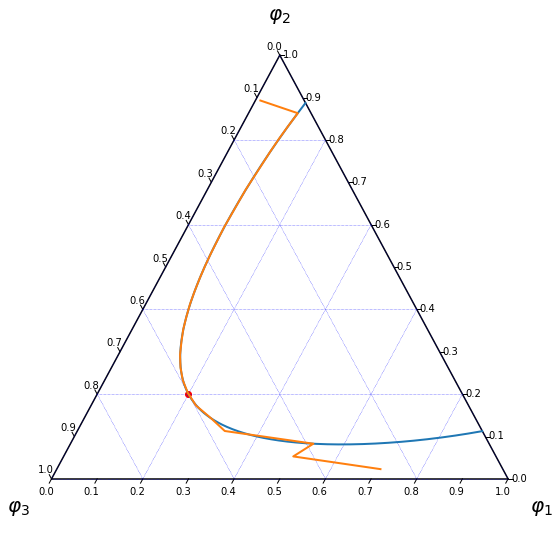

In [159]:
import ternary



fig, tax = ternary.figure(scale=1.0)
fig.set_size_inches(9, 9)


tax.get_axes().axis('off')
tax.clear_matplotlib_ticks()
tax.ticks(axis='lbr', linewidth=1, multiple=0.1, tick_formats="%.1f")
tax.boundary()
tax.right_corner_label("$\\varphi_1$", fontsize=20)
tax.top_corner_label("$\\varphi_2$", fontsize=20)
tax.left_corner_label("$\\varphi_3$", fontsize=20)
tax.gridlines(multiple=0.2, color="blue")
tax.scatter([(rounded_root[0,0], rounded_root[0,1] ,1.-sum(rounded_root[0]))], marker='o', color='red', 
            label="Critical Point")
tax.plot(points_sp, linewidth=2.0, label="Spinodal")
tax.plot(binodal_points, linewidth=2.0, label="Binodal")

tax.show()
## please note that negative regions in the spinodal is not important and can be ignored. 
## roots are still satisfying the condition (phi1+phi2+phi3=1)

In [160]:
roots

array([[0.00773455, 0.893     , 0.00773455, 0.893     ],
       [0.03666003, 0.893     , 0.03666003, 0.893     ],
       [0.04468522, 0.893     , 0.04468522, 0.893     ],
       [0.893     , 0.01084623, 0.01084623, 0.893     ],
       [0.893     , 0.01084623, 0.01084623, 0.893     ]])